# Proyecto: Predicción de Abandono de Clientes Bancarios

## Introducción a los Datasets

### Dataset 1: Predicción de Abandono de Clientes Bancarios (Bank Customer Churn)

**Descripción General:**
Este conjunto de datos contiene información sobre clientes de un banco y su comportamiento, con el objetivo de predecir si un cliente abandonará o no el banco (*churn*). La variable objetivo es `Exited`, que indica si el cliente dejó de ser parte del banco (`1`) o si permaneció (`0`).

**Características del Dataset (Variables relevantes):**
- `CustomerId`: Identificador único del cliente.
- `Surname`: Apellido del cliente.
- `CreditScore`: Puntuación de crédito del cliente.
- `Geography`: País de residencia (ej. Francia, España, Alemania).
- `Gender`: Género del cliente.
- `Age`: Edad del cliente.
- `Tenure`: Años de permanencia en el banco.
- `Balance`: Saldo promedio del cliente.
- `NumOfProducts`: Número de productos que el cliente tiene con el banco.
- `HasCrCard`: Indica si tiene tarjeta de crédito.
- `IsActiveMember`: Indica si el cliente es considerado activo.
- `EstimatedSalary`: Salario estimado del cliente.
- `Exited`: (Variable objetivo) `1` si el cliente se fue del banco, `0` si sigue.

**Objetivo del Proyecto:**
Analizar los factores que influyen en la decisión de un cliente de abandonar el banco. A partir de esto, se puede crear un modelo predictivo que ayude al banco a identificar clientes en riesgo y tomar medidas preventivas de retención.



## 1. Información General
- **Nombre del Proyecto**: 
- **Nombres del Equipo y Roles**:
  - Integrante 1 - Rol
  - Integrante 2 - Rol
- **Resumen del Proyecto**:
Este proyecto busca identificar los factores que influyen en el abandono de clientes usando modelos de analítica de negocios y aprendizaje automático.

## 2. Perspectiva del Negocio
- Contexto del problema y por qué es relevante en el entorno empresarial.
- Impacto potencial de las predicciones.
- Aplicaciones reales en la toma de decisiones.

## 3. Análisis Exploratorio de Datos
- Cargar dataset.
- Revisar estructura de datos.
- Estadísticas descriptivas.
- Visualización inicial.

In [166]:
# Cargar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder

In [167]:
# Cargar datos
dfchurn = pd.read_csv('Churn_Modelling.csv')
dfchurn.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [168]:
#Reviso valores nulos
dfchurn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [169]:
dfchurn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [170]:
dfchurn.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

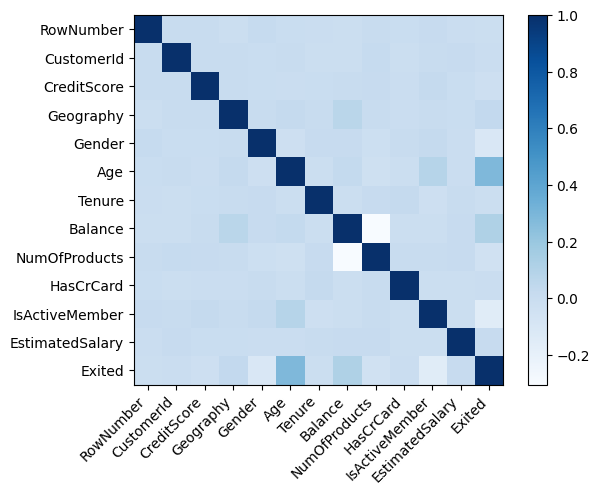

In [218]:
dfchurn1=dfchurn.drop(['Surname'],axis='columns')
label_encoder=LabelEncoder()
dfchurn1["Geography"]=label_encoder.fit_transform(dfchurn1["Geography"])
dfchurn1["Gender"]=label_encoder.fit_transform(dfchurn1["Gender"])

matrix = dfchurn1.corr()
# plotting correlation matrix
plt.imshow(matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# extracting variable names
variables = []
for i in matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)

# Display the plot
plt.show()

In [ ]:
print(matrix)

                 RowNumber  CustomerId  CreditScore  Geography    Gender  \
RowNumber         1.000000    0.004202     0.005840  -0.010358  0.018196   
CustomerId        0.004202    1.000000     0.005308   0.006516 -0.002641   
CreditScore       0.005840    0.005308     1.000000   0.007888 -0.002857   
Geography        -0.010358    0.006516     0.007888   1.000000  0.004719   
Gender            0.018196   -0.002641    -0.002857   0.004719  1.000000   
Age               0.000783    0.009497    -0.003965   0.022812 -0.027544   
Tenure           -0.006495   -0.014883     0.000842   0.003739  0.014733   
Balance          -0.009067   -0.012419     0.006268   0.069408  0.012087   
NumOfProducts     0.007246    0.016972     0.012238   0.003972 -0.021859   
HasCrCard         0.000599   -0.014025    -0.005458  -0.008523  0.005766   
IsActiveMember    0.012044    0.001665     0.025651   0.006724  0.022544   
EstimatedSalary  -0.005988    0.015271    -0.001384  -0.001369 -0.008112   
Exited      

<Axes: >

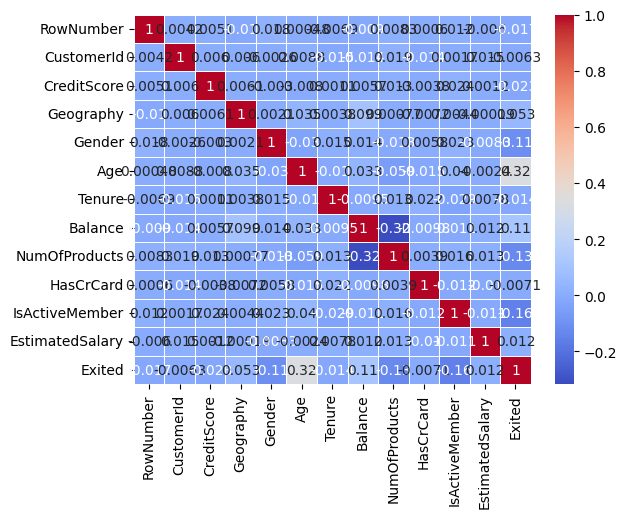

In [220]:
sns.heatmap(dfchurn1.corr(method = 'spearman' , numeric_only= True ), annot= True ,cmap= 'coolwarm' , linewidths= 0.5 )

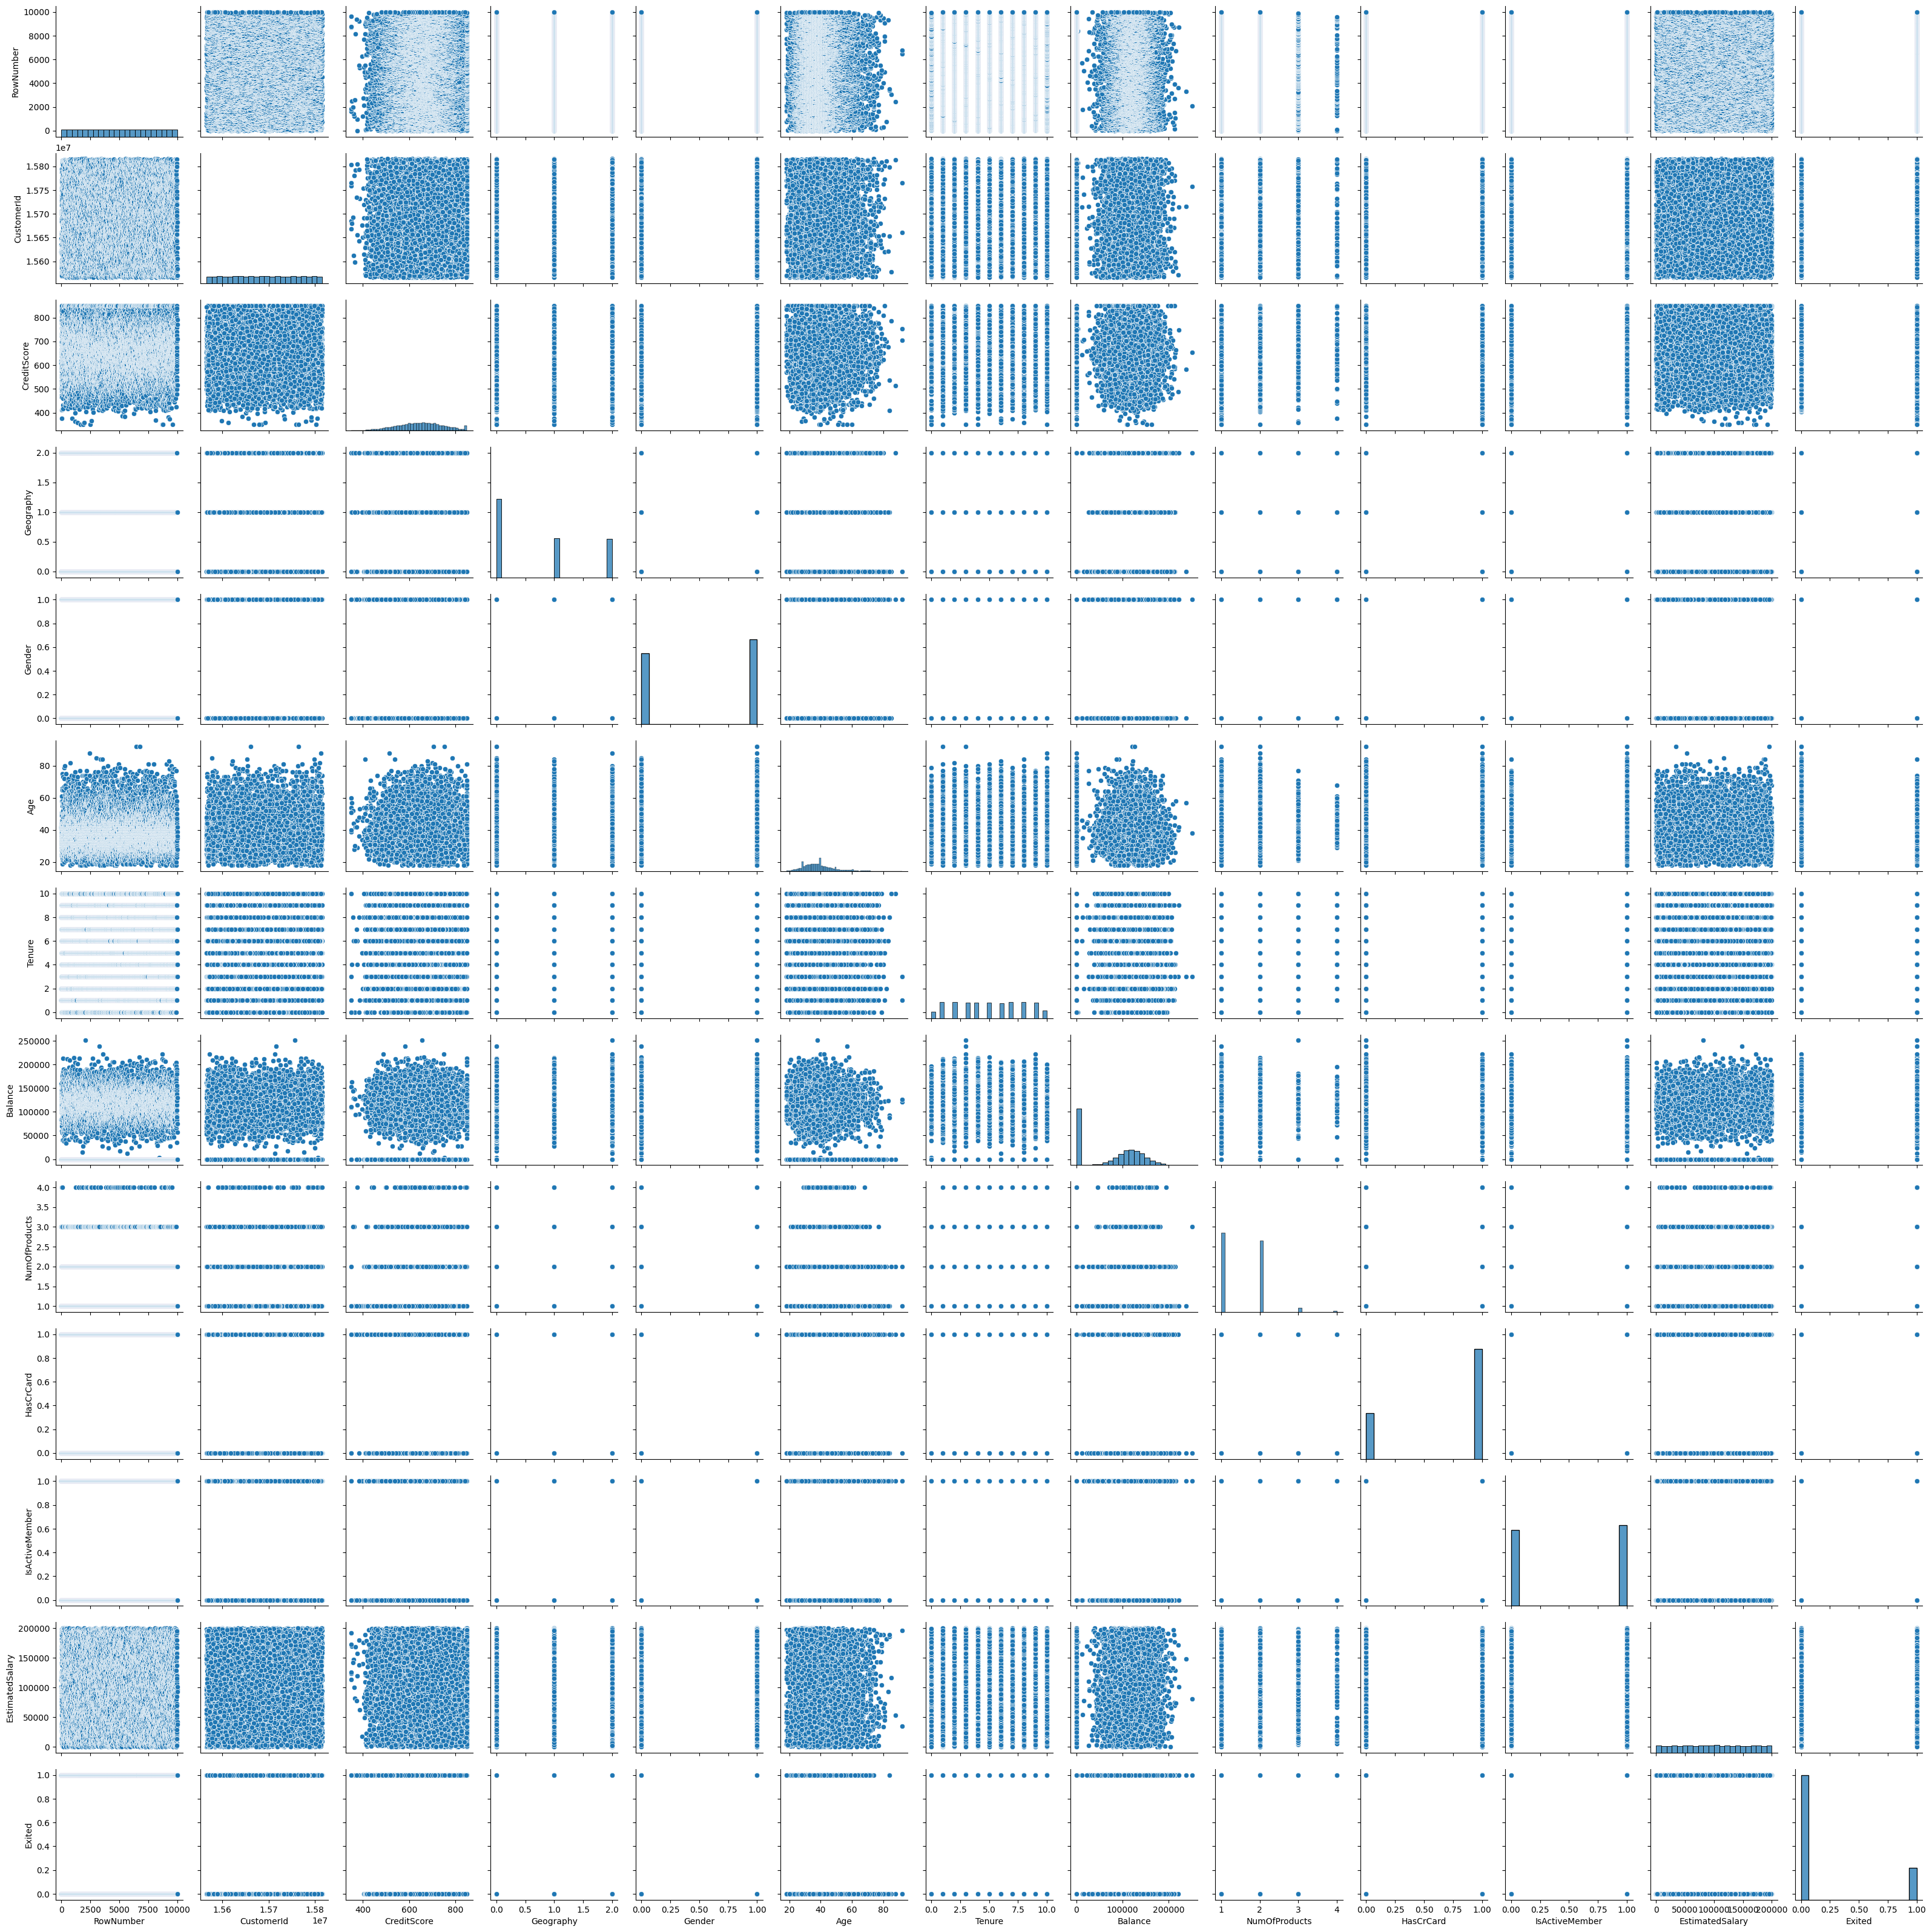

In [221]:
sns.pairplot(dfchurn1)

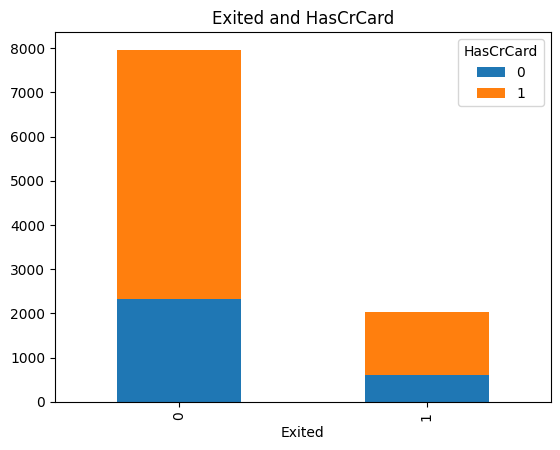

In [222]:
mycrosstab1=pd.crosstab(dfchurn.Exited,dfchurn.HasCrCard)
mycrosstab1.plot.bar(stacked=True)

plt.legend(title="HasCrCard")
plt.title('Exited and HasCrCard')

plt.show()

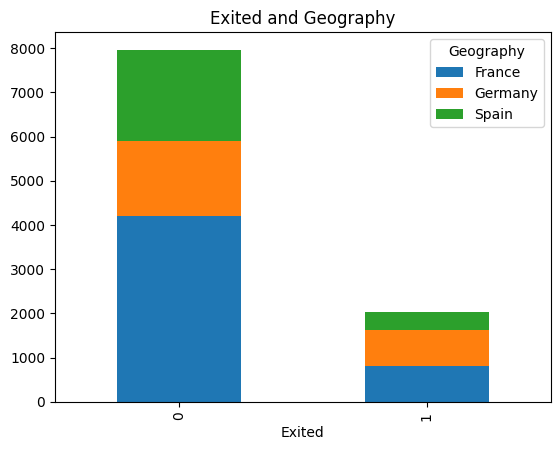

In [223]:
Geocrosstab=pd.crosstab(dfchurn.Exited,dfchurn.Geography)
Geocrosstab.plot.bar(stacked=True)

plt.legend(title="Geography")
plt.title('Exited and Geography')

plt.show()

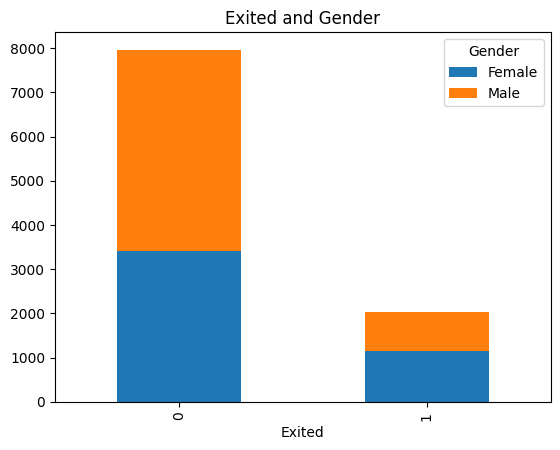

In [224]:
Gencrosstab=pd.crosstab(dfchurn.Exited,dfchurn.Gender)
Gencrosstab.plot.bar(stacked=True)

plt.legend(title="Gender")
plt.title('Exited and Gender')

plt.show()

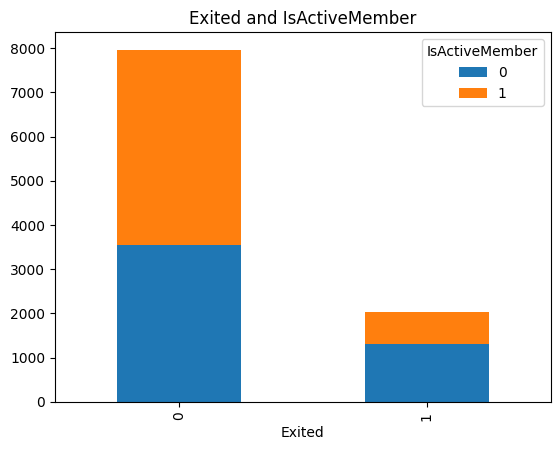

In [225]:
AcMcrosstab=pd.crosstab(dfchurn.Exited,dfchurn.IsActiveMember)
AcMcrosstab.plot.bar(stacked=True)

plt.legend(title="IsActiveMember")
plt.title('Exited and IsActiveMember')

plt.show()

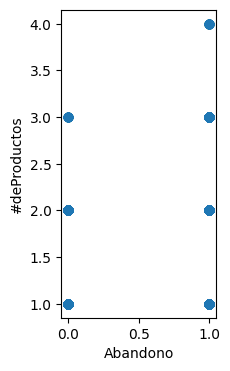

In [226]:
fig, ax = plt.subplots(1, 1, figsize=(2,4))
ax.scatter(x=dfchurn.Exited, y=dfchurn.NumOfProducts, alpha= 0.8)
ax.set_xlabel('Abandono')
ax.set_ylabel('#deProductos');

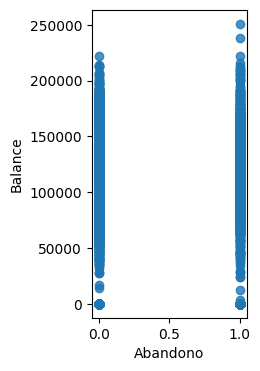

In [227]:
fig, ax = plt.subplots(1, 1, figsize=(2,4))
ax.scatter(x=dfchurn.Exited, y=dfchurn.Balance, alpha= 0.8)
ax.set_xlabel('Abandono')
ax.set_ylabel('Balance');

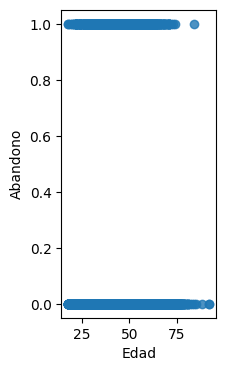

In [241]:
fig, ax = plt.subplots(1, 1, figsize=(2,4))
ax.scatter(x=dfchurn.Age, y=dfchurn.Exited, alpha= 0.8)
ax.set_xlabel('Edad')
ax.set_ylabel('Abandono');

<Axes: >

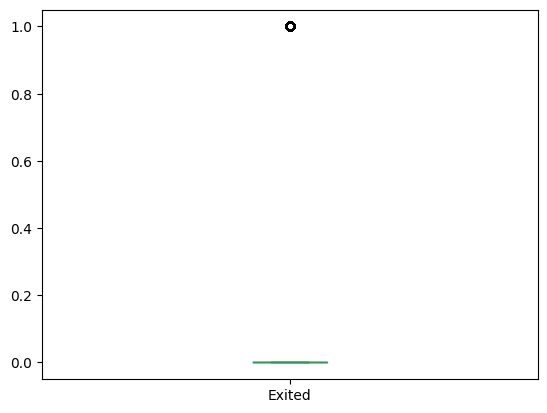

In [229]:
dfchurn['Exited'].plot.box()

<Axes: ylabel='Frequency'>

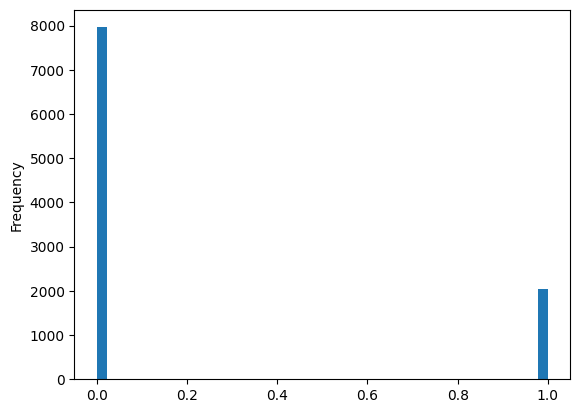

In [230]:
dfchurn['Exited'].plot.hist(bins = 45)

<Axes: ylabel='Frequency'>

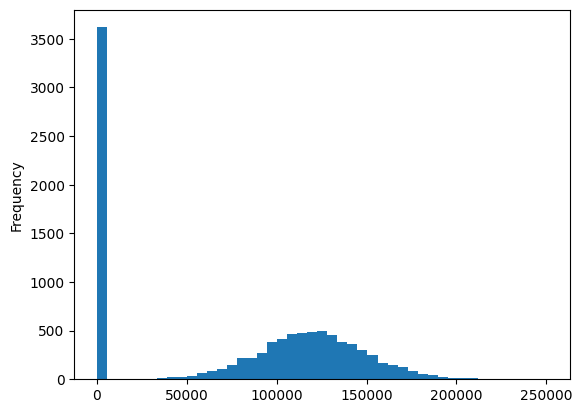

In [231]:
dfchurn['Balance'].plot.hist(bins = 45)

<Axes: ylabel='Frequency'>

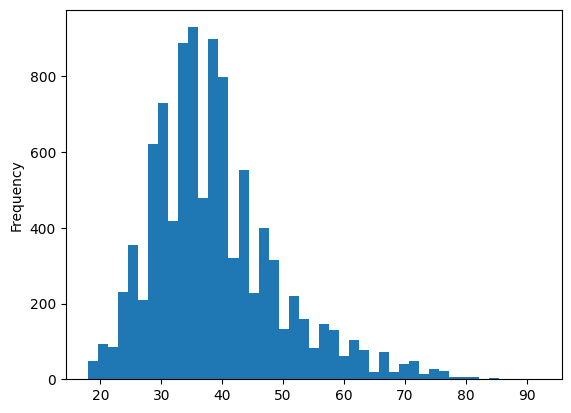

In [240]:
dfchurn['Age'].plot.hist(bins = 45)

<Axes: ylabel='Frequency'>

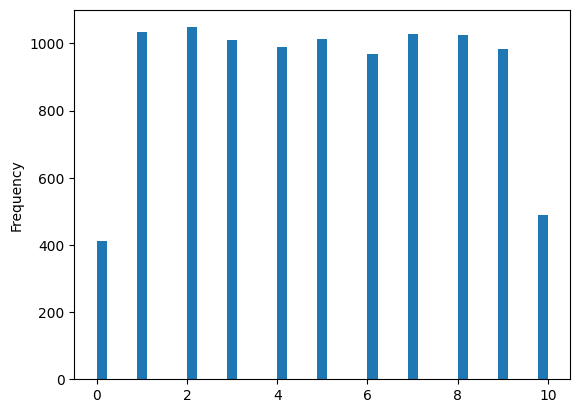

In [232]:
dfchurn['Tenure'].plot.hist(bins = 45)

<Axes: ylabel='Frequency'>

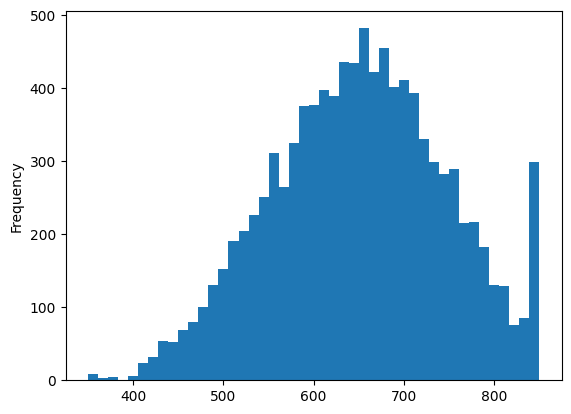

In [233]:
dfchurn['CreditScore'].plot.hist(bins = 45)

## 4. Preprocesamiento y Limpieza de Datos
- Identificación y manejo de valores nulos o duplicados.
- Transformaciones necesarias.
- Codificación y escalamiento si aplica.

In [234]:
# Preprocesamiento del dataset
X_secuencia=dfchurn1.drop(['RowNumber','CustomerId','Exited'],axis='columns')
X_secuencia.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [249]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

In [236]:
#Divide en test y entrenamiento y entrena el modelo
validation_size = 0.20
seed = 7
X_train_MRL, X_validation_MRL, Y_train_MRL, Y_validation_MRL = model_selection.train_test_split(X_secuencia, dfchurn1.Exited, random_state=seed)

# Entrenamiento del Modelo
model_MRL = linear_model.LogisticRegression(max_iter=1000)
model_MRL.fit(X_train_MRL,Y_train_MRL)

#Calcula el score
print(f'El porcentaje de aciertos del modelo fue {model_MRL.score(X_validation_MRL,Y_validation_MRL)}')

El porcentaje de aciertos del modelo fue 0.8132


c:\Users\ybing\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


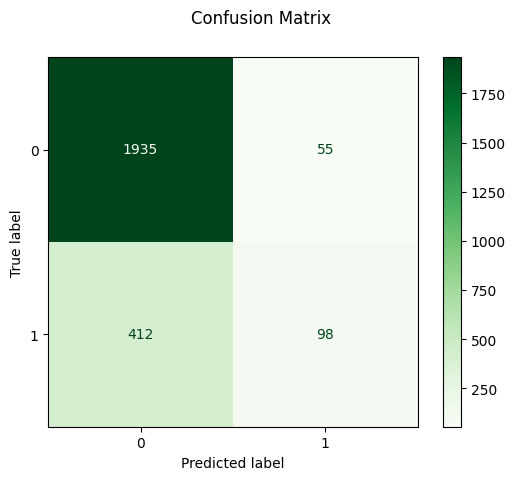

In [237]:
#Matriz de Confusión

categorias = ["0","1"]
fig=ConfusionMatrixDisplay.from_estimator(model_MRL, X_validation_MRL, Y_validation_MRL,display_labels=categorias, cmap="Greens")  
fig.figure_.suptitle("Confusion Matrix")
plt.show()

In [238]:
print(dfchurn1.groupby('Exited').size())

Exited
0    7963
1    2037
dtype: int64


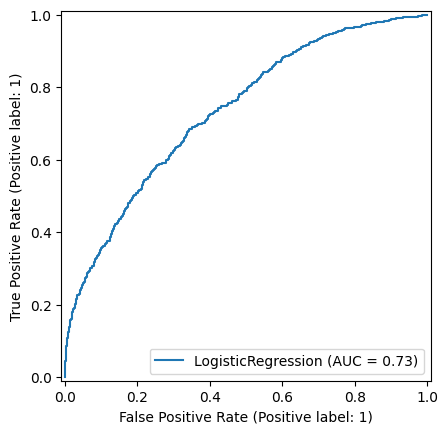

In [251]:
RocCurveDisplay.from_estimator(
   model_MRL, X_validation_MRL, Y_validation_MRL)
plt.show()

In [252]:
#Random forest

from sklearn.ensemble import RandomForestClassifier

#Definición del Modelo 
Model_MRF = RandomForestClassifier(n_jobs=2, random_state=0)
#fit/train -> Se hace el entrenamiendo del modelo
Model_MRF.fit(X_train_MRL, Y_train_MRL)
print(f'El porcentaje de aciertos del modelo fue {Model_MRF.score(X_validation_MRL,Y_validation_MRL)}')

El porcentaje de aciertos del modelo fue 0.8576


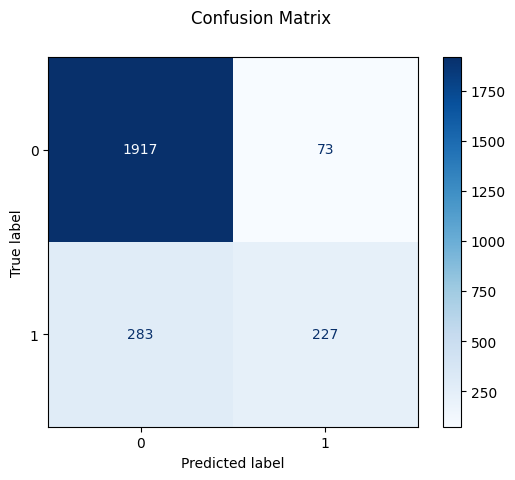

In [253]:
#Matriz de Confusión
categorias = ["0","1"]
fig=ConfusionMatrixDisplay.from_estimator(Model_MRF, X_validation_MRL, Y_validation_MRL,display_labels=categorias, cmap="Blues")  
fig.figure_.suptitle("Confusion Matrix")
plt.show()

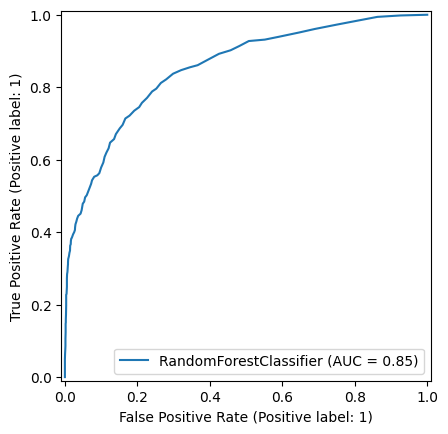

In [254]:
RocCurveDisplay.from_estimator(
   Model_MRF, X_validation_MRL, Y_validation_MRL)
plt.show()

## 5. Modelado Predictivo
- División de datos de entrenamiento y prueba.
- Selección de modelos.
- Entrenamiento y validación.

In [ ]:
# Entrenamiento de modelos
a

NameError: name 'a' is not defined

## 6. Evaluación del Modelo
- Métricas de evaluación.
- Interpretación de resultados.
- Ajustes necesarios.

In [255]:
# Evaluación del modelo


## 7. Visualización de Resultados
- Crear visualizaciones relevantes.
- Mostrar resultados clave.

In [ ]:
# Visualizaciones finales
a

## 8. Conclusiones y Recomendaciones
- Conclusiones generales basadas en el análisis.
- Recomendaciones prácticas para el negocio.

## 9. Documentación Técnica
- Explicación de cómo ejecutar el proyecto paso a paso.
- Herramientas utilizadas con breve descripción y enlaces.
- Repositorio con código/documentación si aplica.

## 10. Recursos Adicionales
- Enlaces útiles.
- Lecturas recomendadas.
- Otros materiales de apoyo.